In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [110]:
#load the dataset and separate the features from the labels
df=pd.read_csv('dataset.csv')
X=np.array(df[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum","source_ip","dest_ip"]],dtype=np.chararray)
Y=np.array(df[["label"]],dtype=bool)

#convert the features to numerical values

X=X.reshape(X.shape[0],X.shape[1])

Y=Y.reshape(Y.shape[0],)

for i in range(0,len(X)):
    for j in range(0,len(X[i])):
        X[i][j]=int(str(X[i][j]),2)

#split the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train[0])




[4 5 0 52 25456 2 0 119 6 58849 3677196412 3398534198]


In [137]:
#create the model for the decision tree
Model=DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best')
#train the model
Model.fit(X_train,Y_train)
#predict the labels for the testing dataset
y_pred=Model.predict(X_test)
#calculate the accuracy of the model
accuracy=sklearn.metrics.accuracy_score(Y_test,y_pred)
loss=sklearn.metrics.log_loss(Y_test,y_pred)
print(f"accuracy: {accuracy} loss: {loss}")



accuracy: 0.9528769841269841 loss: 1.6984856507768502


In [138]:
df_ver=pd.read_csv('verification.csv')
X_ver=np.array(df_ver[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum","source_ip","dest_ip"]],dtype=object)
X_ver=X_ver.reshape(X_ver.shape[0],X_ver.shape[1])
for i in range(0,len(X_ver)):
    for j in range(0,len(X_ver[i])):
        X_ver[i][j]=int(str(X_ver[i][j]),2)
print(X_ver[0])
Y_ver=np.array(df_ver[["label"]],dtype=bool)
Y_ver=Y_ver.reshape(Y_ver.shape[0],)
y_pred=Model.predict(X_ver)
accuracy=sklearn.metrics.accuracy_score(Y_ver,y_pred)
loss=sklearn.metrics.f1_score(Y_ver,y_pred)
print(f"accuracy: {accuracy} loss: {loss}")



[4 5 0 1412 64865 2 0 56 6 25305 3668882480 3398534088]
accuracy: 0.8662911541610805 loss: 0.8535902892724837


In [139]:
#print the number of IPs that are the same in verification and training dataset out of the total number of IPs in the verification dataset
print(len(set(df_ver['source_ip']).intersection(set(df['source_ip']))) / len(df_ver['source_ip']))

0.013433869908311363


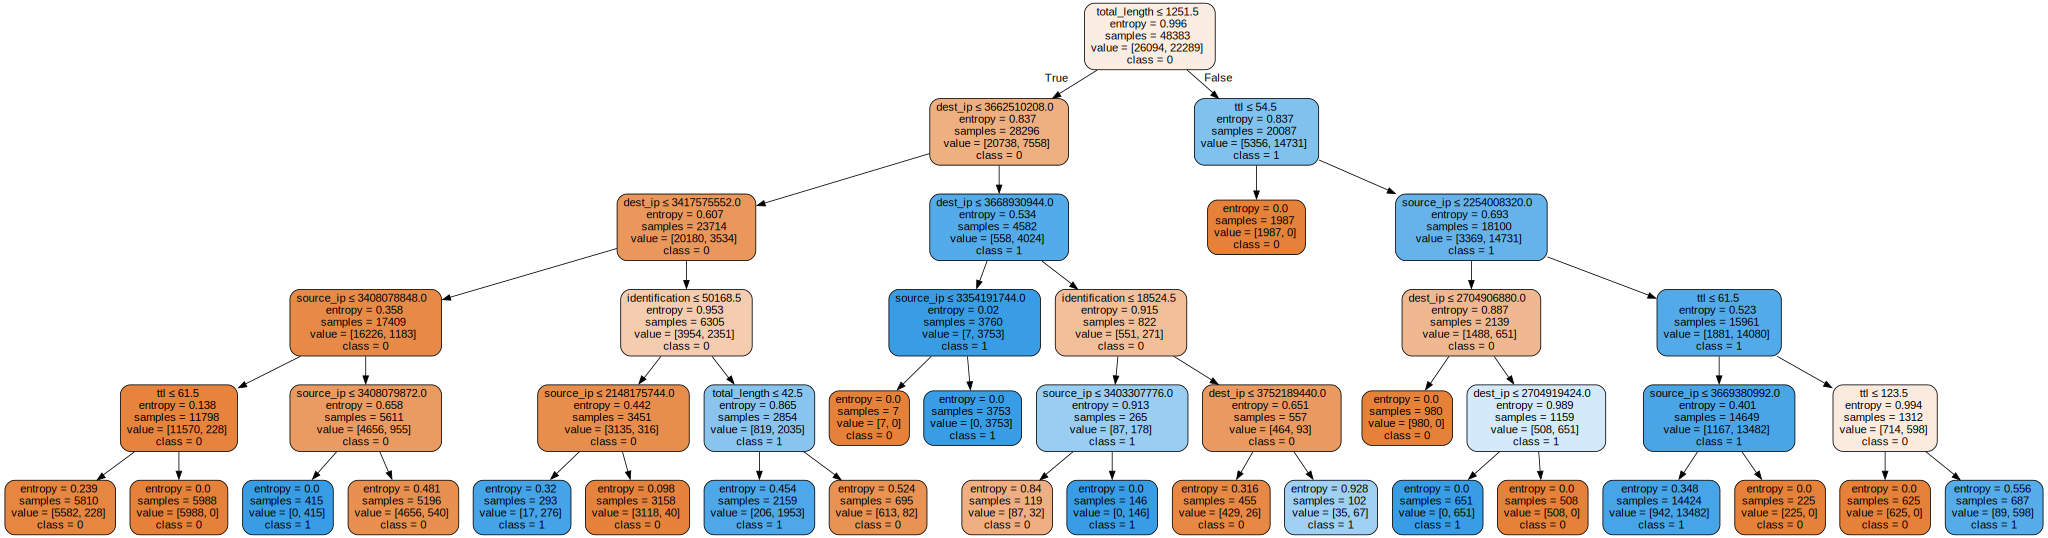

In [140]:
dot_data = export_graphviz(Model, out_file=None, feature_names=["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum","source_ip","dest_ip"],
                           class_names=['0', '1'], filled=True, rounded=True,
                           special_characters=True)

# visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render('decision_tree_model', format='png') # save the visualization as a PNG file
graph # show the visualization in the Jupyter Notebook


